In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [4]:
from tensorflow.keras.regularizers import l2

In [5]:
img_height = 128
img_width = 128
batch_size = 100

ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "imagedataset/train/",
    labels="inferred",
    label_mode="int", 
    color_mode="grayscale",
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.01,
    subset="training",
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "imagedataset/test/",
    labels="inferred",
    label_mode="int", 
    color_mode="grayscale",
    batch_size=1
    ,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.95,
    subset="validation",
)


Found 70070 files belonging to 35 classes.
Using 69370 files for training.
Found 6965 files belonging to 35 classes.
Using 6616 files for validation.


In [6]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=64,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[128, 128, 1]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(Dense(35, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2097280   
_________________________________________________________________
dense_1 (Dense)              (None, 35)                4

In [10]:
r=cnn.fit(x = ds_train, validation_data = ds_validation, epochs = 10)

Epoch 1/10
694/694 [==============================] - 243s 349ms/step - loss: 1.0192 - accuracy: 0.0285 - val_loss: 0.9749 - val_accuracy: 0.0289
Epoch 2/10
694/694 [==============================] - 233s 335ms/step - loss: 0.9723 - accuracy: 0.0285 - val_loss: 0.9747 - val_accuracy: 0.0289
Epoch 3/10
694/694 [==============================] - 230s 332ms/step - loss: 0.9725 - accuracy: 0.0283 - val_loss: 0.9749 - val_accuracy: 0.0280
Epoch 4/10
694/694 [==============================] - 223s 322ms/step - loss: 0.9723 - accuracy: 0.0285 - val_loss: 0.9748 - val_accuracy: 0.0280
Epoch 5/10
694/694 [==============================] - 228s 329ms/step - loss: 0.4318 - accuracy: 0.0189 - val_loss: 0.3505 - val_accuracy: 0.0077
Epoch 6/10
694/694 [==============================] - 230s 331ms/step - loss: 0.3478 - accuracy: 0.0238 - val_loss: 0.3503 - val_accuracy: 0.0429
Epoch 7/10
694/694 [==============================] - 231s 332ms/step - loss: 0.3477 - accuracy: 0.0266 - val_loss: 0.3503 -

In [1]:

loss=[1.0192,0.9723,0.9725,0.9723,0.4318,0.3478,0.3477,0.3477,0.3477,0.3477]
val_loss=[0.9749,0.9747,0.9749,0.9748,0.3505,0.3503,0.3503,0.3503,0.3503,0.3503]
accuracy=[0.0285,0.0285,0.0283,0.0285,0.0189,0.0283,0.0266,0.0272,0.0292,0.0274]
val_accuracy=[0.0289,0.0289,0.0280,0.0077,0.0429,0.0361,0.0142,7.5574e-0,0.0287]

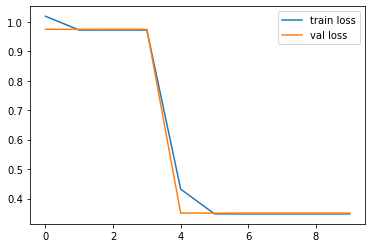

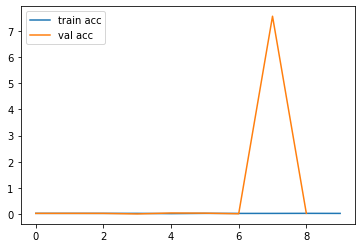

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
plt.plot(loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(accuracy, label='train acc')
plt.plot(val_accuracy, label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')